In [87]:
import pandas as pd
import numpy as np
import string
import re
from collections import Counter

In [144]:
raw_data = pd.read_csv('./position.csv')

In [145]:
raw_data.head()

,ground_truth,prediction,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,Denver Broncos,National Football League ( NFL ) for the 2015 ...,which,nfl,team,represented,the,afc,at,super,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Carolina Panthers,National Football League ( NFL ) for the 2015 ...,which,nfl,team,represented,the,nfc,at,super,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Santa Clara , California",Santa Clara,where,did,super,bowl,50,take,place,?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Denver Broncos,Denver Broncos,which,nfl,team,won,super,bowl,50,?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,golden,"golden anniversary """,what,color,was,used,to,emphasize,the,50th,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
raw_data = raw_data[:-10:]
#raw_data['if_right'] = raw_data.apply(lambda x: np.int(x['ground_truth']==x['prediction']))

In [147]:
raw_data['if_right'] = (raw_data['ground_truth']==raw_data['prediction'])

In [148]:
raw_data['Q_len'] = raw_data.apply(lambda x: len([t for t in x if t is not np.nan]),axis=1)

In [151]:
wh_words = ['what','who','how','when','where','which','why']

In [154]:
raw_data['wh_word'] = raw_data['0']

In [186]:
raw_data['A_len'] = raw_data['prediction'].apply(lambda x:len(str(x).strip().split(' ')))

In [187]:
raw_data

,ground_truth,prediction,0,1,2,3,4,5,6,7,...,28,29,30,31,32,33,if_right,Q_len,wh_word,A_len
0,Denver Broncos,National Football League ( NFL ) for the 2015 ...,which,nfl,team,represented,the,afc,at,super,...,NaN,NaN,NaN,NaN,NaN,NaN,False,14,which,21
1,Carolina Panthers,National Football League ( NFL ) for the 2015 ...,which,nfl,team,represented,the,nfc,at,super,...,NaN,NaN,NaN,NaN,NaN,NaN,False,14,which,21
2,"Santa Clara , California",Santa Clara,where,did,super,bowl,50,take,place,?,...,NaN,NaN,NaN,NaN,NaN,NaN,False,11,where,2
3,Denver Broncos,Denver Broncos,which,nfl,team,won,super,bowl,50,?,...,NaN,NaN,NaN,NaN,NaN,NaN,True,11,which,2
4,golden,"golden anniversary """,what,color,was,used,to,emphasize,the,50th,...,NaN,NaN,NaN,NaN,NaN,NaN,False,17,what,4
5,""" golden anniversary """,an American football game to determine the cha...,what,was,the,theme,of,super,bowl,50,...,NaN,NaN,NaN,NaN,NaN,NaN,False,12,what,13
6,"February 7 , 2016","February 7 , 2016",what,day,was,the,game,played,on,?,...,NaN,NaN,NaN,NaN,NaN,NaN,True,11,what,4
7,American Football Conference,The American Football Conference,what,is,the,afc,short,for,?,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,10,what,4
8,""" golden anniversary """,an American football game to determine the cha...,what,was,the,theme,of,super,bowl,50,...,NaN,NaN,NaN,NaN,NaN,NaN,False,12,what,13
9,American Football Conference,The American Football Conference,what,does,afc,stand,for,?,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,9,what,4


In [188]:
df = raw_data[['ground_truth','prediction','Q_len','if_right','wh_word','A_len']]

In [157]:
def normalize_answer(s):
    """Lower text and remove punctuation, articles and extra whitespace."""
    def remove_articles(text):
        return re.sub(r'\b(a|an|the)\b', ' ', text)

    def white_space_fix(text):
        return ' '.join(text.split())

    def remove_punc(text):
        exclude = set(string.punctuation)
        return ''.join(ch for ch in text if ch not in exclude)

    def lower(text):
        return text.lower()

    return white_space_fix(remove_articles(remove_punc(lower(s))))


def f1_score(prediction, ground_truth):
    prediction_tokens = normalize_answer(prediction).split()
    ground_truth_tokens = normalize_answer(ground_truth).split()
    common = Counter(prediction_tokens) & Counter(ground_truth_tokens)
    num_same = sum(common.values())
    if num_same == 0:
        return 0
    precision = 1.0 * num_same / len(prediction_tokens)
    recall = 1.0 * num_same / len(ground_truth_tokens)
    f1 = (2 * precision * recall) / (precision + recall)
    return f1

In [158]:
def individual_f1(group):
    return(f1_score(group['prediction'],group['ground_truth']))

In [190]:
df['ground_truth'] = df['ground_truth'].apply(str)
df['prediction'] = df['prediction'].apply(str)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [191]:
df['f1']=df.apply(individual_f1,axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [192]:
df

,ground_truth,prediction,Q_len,if_right,wh_word,A_len,f1
0,Denver Broncos,National Football League ( NFL ) for the 2015 ...,14,False,which,21,0.250000
1,Carolina Panthers,National Football League ( NFL ) for the 2015 ...,14,False,which,21,0.000000
2,"Santa Clara , California",Santa Clara,11,False,where,2,0.800000
3,Denver Broncos,Denver Broncos,11,True,which,2,1.000000
4,golden,"golden anniversary """,17,False,what,4,0.666667
5,""" golden anniversary """,an American football game to determine the cha...,12,False,what,13,0.000000
6,"February 7 , 2016","February 7 , 2016",11,True,what,4,1.000000
7,American Football Conference,The American Football Conference,10,False,what,4,1.000000
8,""" golden anniversary """,an American football game to determine the cha...,12,False,what,13,0.000000
9,American Football Conference,The American Football Conference,9,False,what,4,1.000000


In [171]:
wh_f1=df[['wh_word','f1']].groupby('wh_word')['f1'].apply(np.mean)

In [172]:
wh_f1=wh_f1.reset_index()
wh_f1.index=wh_f1['wh_word'].tolist()
wh_f1

,wh_word,f1
"""","""",0.500000
$,$,1.000000
2,2,0.971429
2011-12,2011-12,0.857143
_____,_____,0.000000
______,______,0.040816
a,a,0.550908
abc,abc,0.759596
ableine,ableine,0.117647
about,about,0.719212


In [173]:
wh_em=df[['wh_word','if_right']].groupby('wh_word')['if_right'].apply(np.mean)

In [174]:
wh_em=wh_em.reset_index()
wh_em.index=wh_em['wh_word'].tolist()
wh_em

,wh_word,if_right
"""","""",0.500000
$,$,1.000000
2,2,0.000000
2011-12,2011-12,0.000000
_____,_____,0.000000
______,______,0.000000
a,a,0.241379
abc,abc,0.454545
ableine,ableine,0.000000
about,about,0.571429


In [99]:
(4367)+(1103)+(958)+(658)+(402)+(367)+(136)

7991

In [126]:
wh_em.loc['what','if_right']

0.36431784107946025

In [175]:
em_list=[wh_em.loc[x,'if_right'] for x in wh_words]
f1_list=[wh_f1.loc[x,'f1'] for x in wh_words]

In [179]:
wh_words

['what', 'who', 'how', 'when', 'where', 'which', 'why']

In [180]:
em_list

[0.3447550977506832,
 0.5329566854990584,
 0.43853211009174314,
 0.6451149425287356,
 0.3210161662817552,
 0.3956043956043956,
 0.11920529801324503]

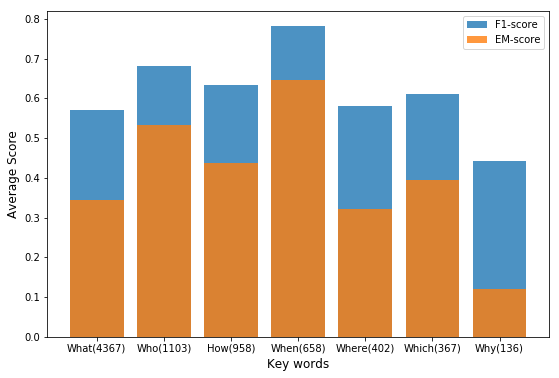

In [176]:
import matplotlib.pyplot as plt

x_data = ['What(4367)','Who(1103)','How(958)','When(658)','Where(402)','Which(367)','Why(136)']
y_data = em_list
y_data2 = f1_list

fig = plt.figure(figsize=(9, 6))
plt.bar(x=x_data, height=y_data2, label='F1-score', alpha=0.8)
plt.bar(x=x_data, height=y_data, label='EM-score', alpha=0.8)

#plt.title("Model Performance under Different Question types",size=12)
plt.xlabel("Key words",size=12)
plt.ylabel("Average Score",size=12)
# 显示图例
plt.legend()
plt.savefig('Keyword_score')

In [230]:
num_f1=df.groupby('A_len')['f1'].apply(np.mean)

In [231]:
num_f1=num_f1.reset_index()
num_f1.index=num_f1['A_len'].tolist()
num_f1

,A_len,f1
1,1,0.606661
2,2,0.711494
3,3,0.712556
4,4,0.705441
5,5,0.607632
6,6,0.619566
7,7,0.572212
8,8,0.553105
9,9,0.504853
10,10,0.546032


In [210]:
num_em=df.groupby('A_len')['if_right'].apply(np.mean)

In [211]:
num_em=num_em.reset_index()
num_em.index=num_em['A_len'].tolist()
num_em

,A_len,if_right
1,1,0.528491
2,2,0.523444
3,3,0.437335
4,4,0.403101
5,5,0.274390
6,6,0.257703
7,7,0.206897
8,8,0.172222
9,9,0.127907
10,10,0.184211


In [238]:
em_lists=[num_em.loc[x,'if_right'] for x in range(1,16)]
f1_lists=[num_f1.loc[x,'f1'] for x in range(1,16)]

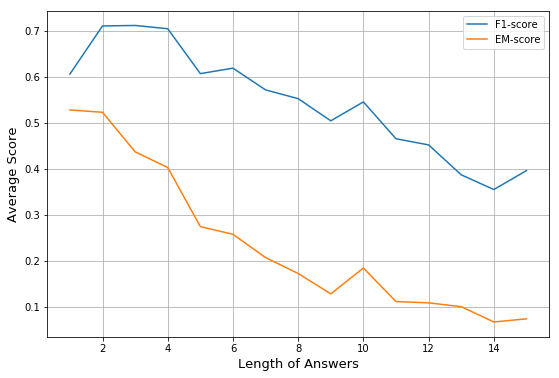

In [239]:
fig = plt.figure(figsize=(9, 6))
plt.grid(True)
plt.plot(np.arange(1,16),f1_lists, label='F1-score')
plt.plot(np.arange(1,16),em_lists, label='EM-score')
plt.legend()
plt.xlabel("Length of Answers", size=13)
plt.ylabel("Average Score", size=13)
#plt.title('Model Performance under Different Answer Lengths')
plt.savefig('Answer_score')